## Searching for a function

## General imports

In [11]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from random import randint
import networkx as nx

In [50]:
%matplotlib inline
from IPython.display import Image, HTML
from matplotlib import animation

def show_anim(anim):
    html = HTML(anim.to_html5_video())
    plt.close()
    return html

#mpl.rc('animation', html='html5')

In [17]:
# Disable plot axes by default
if True:
    mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
    mpl.rc('xtick', top=False, bottom=False, labelsize=0)
    mpl.rc('ytick', left=False, right=False, labelsize=0)

## Converting to/from lists

In [9]:
g = nx.gnm_random_graph(randint(1,100),randint(1,100))
x = '\n'.join(['%d %d' % (len(g.nodes), len(g.edges))] + ['%d %d' % (a+1,b+1) for a,b in g.edges])
x

'42 12\n4 36\n4 27\n9 28\n10 15\n10 39\n11 25\n16 23\n18 35\n21 29\n22 37\n23 41\n28 40'

In [10]:
G = nx.gnm_random_graph(randint(1,10),randint(1,10))
nn = len(G.nodes)
ne = len(G.edges)
from random import randint
colors = ['blue' if randint(0,1) else 'red' for _ in range(nn)]
[v for k,v in sorted(nx.to_dict_of_lists(G).items())]

[[9, 7, 6], [], [], [], [], [], [0], [0], [9], [0, 8]]

## Animations

In [11]:
colors = ['skyblue']*2 + ['lightgrey']*(nn-2)
fig, ax = plt.subplots(figsize=(6,4))
def step(num):
    ax.clear()
    nx.draw(G, pos=nx.shell_layout(G), node_color=colors[num:]+colors[:num], with_labels=True)
show_anim(animation.FuncAnimation(fig, step, frames=nn, interval=1000, repeat=True))

## Drawing tree graphs as a hierarchy

https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

In [14]:
def hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, 
                  pos = None, parent = None):
    '''If there is a cycle that is reachable from root, then this will see infinite recursion.
       G: the graph
       root: the root node of current branch
       width: horizontal space allocated for this branch - avoids overlap with other branches
       vert_gap: gap between levels of hierarchy
       vert_loc: vertical location of root
       xcenter: horizontal location of root
       pos: a dict saying where all nodes go if they have been assigned
       parent: parent of this branch.'''
    if pos == None:
        pos = { root: (xcenter, vert_loc) }
    else:
        pos[root] = (xcenter, vert_loc)
    neighbors = list(G.neighbors(root))
    if parent is not None:        # this should be removed for directed graphs.
        neighbors.remove(parent)  # if directed, then parent not in neighbors.
    if len(neighbors):
        dx = width / len(neighbors) 
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = hierarchy_pos(G, neighbor, width = dx, vert_gap = vert_gap, 
                                vert_loc=vert_loc-vert_gap, xcenter=nextx, pos=pos, 
                                parent=root)
    return pos

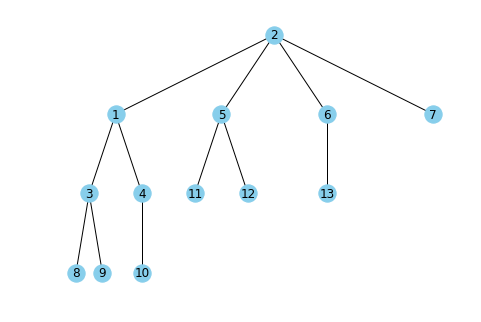

In [15]:
G = nx.Graph([(1,2), (1,3), (1,4), (2,5), (2,6), (2,7), (3,8), (3,9), (4,10), (5,11), (5,12), (6,13)])
nx.draw(G, pos=hierarchy_pos(G, 2), with_labels=True, node_color='skyblue')

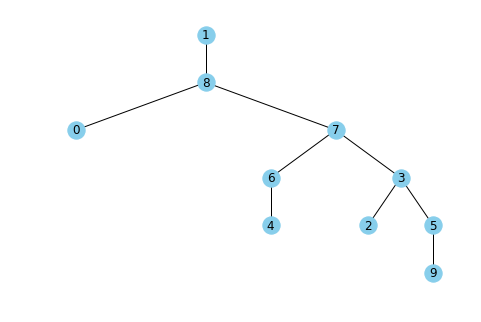

In [16]:
G = nx.generators.tree.random_tree(10)
nx.draw(G, pos=hierarchy_pos(G, 1), with_labels=True, node_color='skyblue')

In [17]:
fig, ax = plt.subplots()
def step(_):
    ax.clear()
    G = nx.generators.tree.random_tree(10)
    nx.draw(G, pos=hierarchy_pos(G, 1), with_labels=True, node_color='skyblue')
show_anim(animation.FuncAnimation(fig, step, frames=10, interval=1000))

## How to install *pydot*

1. Open Anaconda prompt and run:
   ```
   conda install -c dhirschfeld --no-deps pydot
   ```

2. Install MSI from
   http://www.graphviz.org/Download_windows.php

3. Add it to the path:
   ```
   $gvpath = 'C:\Program Files (x86)\Graphviz2.38\bin'; if ($Env:Path -split ';' -notcontains $gvpath) { $ctarget = [EnvironmentVariableTarget]::Machine; $cpath = [Environment]::GetEnvironmentVariable('PATH', $ctarget); [Environment]::SetEnvironmentVariable('PATH', $cpath + ';' + $gvpath, $ctarget); }
   ```

4. Test your installation:
   ```python
   import networkx as nx; nx.nx_pydot.graphviz_layout(nx.Graph([(1,2),(2,3),(1,4)]))
   ```

5. Enjoy!

In [12]:
import pydot; print(pydot.__version__)

1.2.3


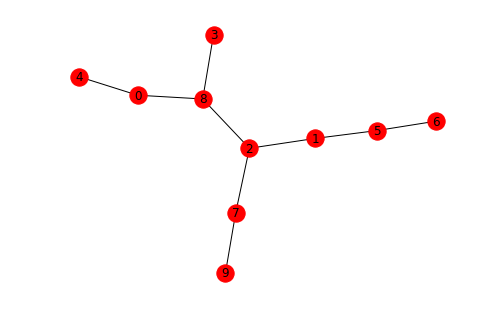

In [13]:
%matplotlib inline
import networkx as nx
t = nx.generators.tree.random_tree(10)
nx.draw(t, pos=nx.nx_pydot.graphviz_layout(t), with_labels=True)

## Hierarchical layout with ```pydot```
See:
https://stackoverflow.com/questions/11479624/is-there-a-way-to-guarantee-hierarchical-output-from-networkx

In [78]:
G = nx.DiGraph()
G.add_node("ROOT")

for i in range(5):
    G.add_nodes_from(["Child_%i" % i,
                      "Grandchild_%i" % i,
                      "Greatgrandchild_%i" % i])
    G.add_edges_from([("ROOT", "Child_%i" % i),
                      ("Child_%i" % i, "Grandchild_%i" % i),
                      ("Grandchild_%i" % i, "Greatgrandchild_%i" % i)])

dot = nx.drawing.nx_pydot.to_pydot(G)

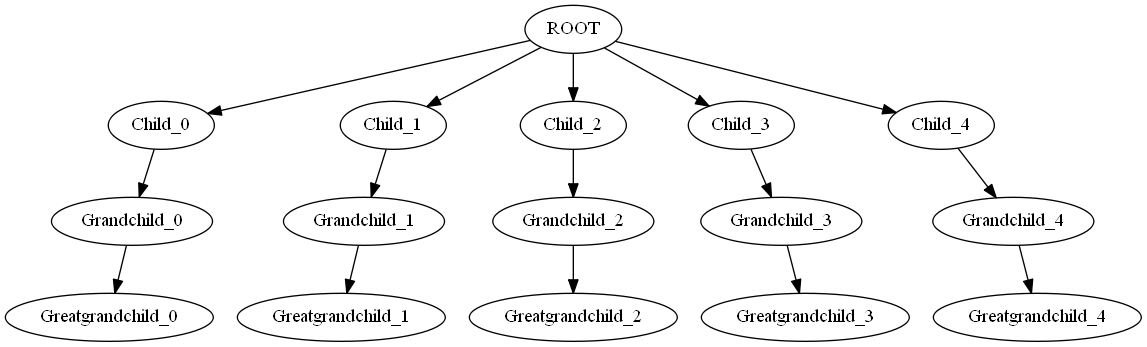

In [72]:
# Display as a PNG image:
from IPython.display import Image
Image(dot.create_png(prog='dot'))

In [73]:
# Display as a SVG image:
from IPython.display import HTML
HTML(dot.create_svg(prog='neato').decode())

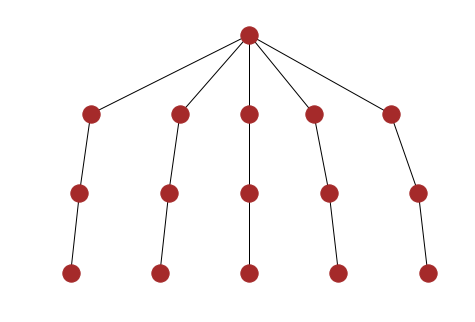

In [74]:
# Same layout using matplotlib (disable labels because NetworkX is not clever enough):
pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw(G, pos=pos, with_labels=False, arrows=False, node_color='brown')

## Layout random trees with graphviz
1. `pydot_layout` is an alias for `graphviz_layout`
2. convert to directed graph to force graphviz produce hierarchy
3. by default node **0** will be root, so we `relabel_nodes` to get a custom root node.

In [39]:
fig, ax = plt.subplots()
def step(_):
    ax.clear()
    G = nx.generators.tree.random_tree(randint(5, 10))
    root = randint(0, len(G.nodes)-1)
    H = nx.relabel_nodes(G, {0:root, root:0})
    pos = nx.nx_pydot.pydot_layout(H.to_directed(), prog='dot')
    colors = ['lightgrey'] + ['skyblue'] * (len(H.nodes) - 1)
    nx.draw(H, pos=pos, with_labels=True, node_color=colors)
show_anim(animation.FuncAnimation(fig, step, frames=10, interval=2000))

## Reading GraphML

In [15]:
import warnings
#warnings.resetwarnings()
#warnings.filterwarnings('ignore', 'No key type for id|GraphML port tag not supported', UserWarning, '.*graphml$')

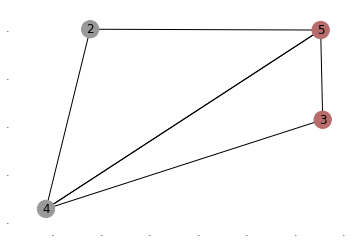

In [58]:
# read graphml from GEPHI
G = nx.read_graphml('test-gephi-1.graphml')
pos = {n: np.array([d['x'], d['y']]) for n,d in G.node.data()}
colors = ['#{r:02x}{g:02x}{b:02x}'.format(**d) for n,d in G.node.data()]
nx.draw_networkx(G.to_undirected(), pos=pos, node_color=colors)

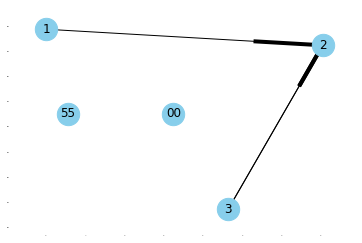

In [59]:
# read graphml from yEd
G = nx.read_graphml('test-yed-1.graphml')
G = nx.relabel_nodes(G, {n: d.get('label','').strip() or n for n,d in G.node.data()})
pos = {n: np.array([float(d['x']), -float(d['y'])]) for n,d in G.node.data()}
nx.draw_networkx(G, pos=pos, node_size=500, node_color='skyblue')

In [61]:
HTML(nx.drawing.nx_pydot.to_pydot(G).create_svg().decode())